In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [3]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

610

In [4]:
# Starting URL for Weather Map API Call.

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fcd05be0edd6fd91056ed9f140fddd5a


In [5]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"

Beginning Data Retrieval     
-----------------------------


In [6]:
#for i, item in enumerate(list):

In [7]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | vaini
Processing Record 2 of Set 13 | sibolga
Processing Record 3 of Set 13 | saint-augustin
Processing Record 4 of Set 13 | rikitea
Processing Record 5 of Set 13 | ushuaia
Processing Record 6 of Set 13 | fortuna
Processing Record 7 of Set 13 | upernavik
Processing Record 8 of Set 13 | khatanga
Processing Record 9 of Set 13 | puerto ayora
Processing Record 10 of Set 13 | nanortalik
Processing Record 11 of Set 13 | athabasca
Processing Record 12 of Set 13 | sibu
Processing Record 13 of Set 13 | los llanos de aridane
Processing Record 14 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 15 of Set 13 | songea
Processing Record 16 of Set 13 | alamosa
Processing Record 17 of Set 13 | ayan
Processing Record 18 of Set 13 | tasiilaq
Processing Record 19 of Set 13 | hovd
Processing Record 20 of Set 13 | mahebourg
Processing Record 21 of Set 13 | marawi
Processing Record 22 of Set 13 | dudinka
Processing Record 23 of Set 13 | hermanus
Processing 

City not found. Skipping...
Processing Record 40 of Set 16 | colesberg
Processing Record 41 of Set 16 | crab hill
City not found. Skipping...
Processing Record 42 of Set 16 | kuche
City not found. Skipping...
Processing Record 43 of Set 16 | kavaratti
Processing Record 44 of Set 16 | petropavlovsk-kamchatskiy
Processing Record 45 of Set 16 | dingle
Processing Record 46 of Set 16 | tilichiki
Processing Record 47 of Set 16 | oranjestad
Processing Record 48 of Set 16 | vardo
Processing Record 49 of Set 16 | port alfred
Processing Record 50 of Set 16 | tiksi
Processing Record 1 of Set 17 | naze
Processing Record 2 of Set 17 | hihifo
City not found. Skipping...
Processing Record 3 of Set 17 | lazaro cardenas
Processing Record 4 of Set 17 | la esperanza
Processing Record 5 of Set 17 | bandarbeyla
Processing Record 6 of Set 17 | ploemeur
Processing Record 7 of Set 17 | cherskiy
Processing Record 8 of Set 17 | iquitos
Processing Record 9 of Set 17 | swan hill
Processing Record 10 of Set 17 | n

Processing Record 21 of Set 20 | arlit
Processing Record 22 of Set 20 | minot
Processing Record 23 of Set 20 | brodokalmak
Processing Record 24 of Set 20 | northam
Processing Record 25 of Set 20 | bethel
Processing Record 26 of Set 20 | vilhena
Processing Record 27 of Set 20 | constitucion
Processing Record 28 of Set 20 | dailly
Processing Record 29 of Set 20 | porto novo
Processing Record 30 of Set 20 | havoysund
Processing Record 31 of Set 20 | san carlos de bariloche
Processing Record 32 of Set 20 | whitehorse
Processing Record 33 of Set 20 | high level
Processing Record 34 of Set 20 | whitianga
Processing Record 35 of Set 20 | fairbanks
Processing Record 36 of Set 20 | buique
Processing Record 37 of Set 20 | college
Processing Record 38 of Set 20 | dovers
Processing Record 39 of Set 20 | kruisfontein
Processing Record 40 of Set 20 | kirovskiy
Processing Record 41 of Set 20 | atar
Processing Record 42 of Set 20 | cap malheureux
Processing Record 43 of Set 20 | pauini
Processing Reco

Processing Record 7 of Set 24 | aketi
Processing Record 8 of Set 24 | svetlyy
Processing Record 9 of Set 24 | el badari
City not found. Skipping...
Processing Record 10 of Set 24 | shkotovo-26
City not found. Skipping...
Processing Record 11 of Set 24 | milkovo
Processing Record 12 of Set 24 | ambovombe
Processing Record 13 of Set 24 | fare
Processing Record 14 of Set 24 | chilca
Processing Record 15 of Set 24 | kudahuvadhoo
Processing Record 16 of Set 24 | ahuimanu
Processing Record 17 of Set 24 | zyryanka
Processing Record 18 of Set 24 | san quintin
Processing Record 19 of Set 24 | rognan
Processing Record 20 of Set 24 | deputatskiy
Processing Record 21 of Set 24 | jiexiu
Processing Record 22 of Set 24 | dubbo
Processing Record 23 of Set 24 | kahului
Processing Record 24 of Set 24 | biak
Processing Record 25 of Set 24 | kozhva
Processing Record 26 of Set 24 | indiana
Processing Record 27 of Set 24 | songkhla
Processing Record 28 of Set 24 | tahe
Processing Record 29 of Set 24 | ilheu

In [8]:
len(city_data)

559

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.20,-175.20,71.60,83,20,9.17,TO,2020-07-10 20:42:24
1,Sibolga,1.74,98.78,76.17,74,85,4.05,ID,2020-07-10 20:45:40
2,Saint-Augustin,51.23,-58.65,65.08,78,82,14.36,CA,2020-07-10 20:43:04
3,Rikitea,-23.12,-134.97,67.51,66,79,19.06,PF,2020-07-10 20:42:21
4,Ushuaia,-54.80,-68.30,33.80,74,40,5.82,AR,2020-07-10 20:44:11
5,Fortuna,40.60,-124.16,72.00,72,1,14.99,US,2020-07-10 20:44:29
6,Upernavik,72.79,-56.15,40.82,85,10,22.19,GL,2020-07-10 20:45:40
7,Khatanga,71.97,102.50,53.24,86,98,20.69,RU,2020-07-10 20:42:53
8,Puerto Ayora,-0.74,-90.35,72.00,86,100,4.00,EC,2020-07-10 20:44:50
9,Nanortalik,60.14,-45.24,45.09,94,93,7.20,GL,2020-07-10 20:41:50


In [10]:
new_column_order = ["City", "Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

In [11]:
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vaini,TO,2020-07-10 20:42:24,-21.20,-175.20,71.60,83,20,9.17
1,Sibolga,ID,2020-07-10 20:45:40,1.74,98.78,76.17,74,85,4.05
2,Saint-Augustin,CA,2020-07-10 20:43:04,51.23,-58.65,65.08,78,82,14.36
3,Rikitea,PF,2020-07-10 20:42:21,-23.12,-134.97,67.51,66,79,19.06
4,Ushuaia,AR,2020-07-10 20:44:11,-54.80,-68.30,33.80,74,40,5.82
5,Fortuna,US,2020-07-10 20:44:29,40.60,-124.16,72.00,72,1,14.99
6,Upernavik,GL,2020-07-10 20:45:40,72.79,-56.15,40.82,85,10,22.19
7,Khatanga,RU,2020-07-10 20:42:53,71.97,102.50,53.24,86,98,20.69
8,Puerto Ayora,EC,2020-07-10 20:44:50,-0.74,-90.35,72.00,86,100,4.00
9,Nanortalik,GL,2020-07-10 20:41:50,60.14,-45.24,45.09,94,93,7.20


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


In [18]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1594414662.0630376

In [19]:
today = time.strftime("%x")
today

'07/10/20'

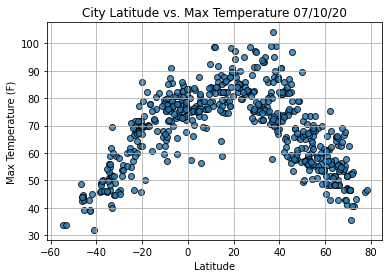

In [20]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

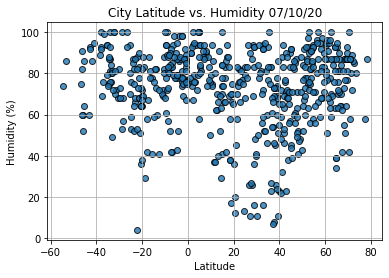

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

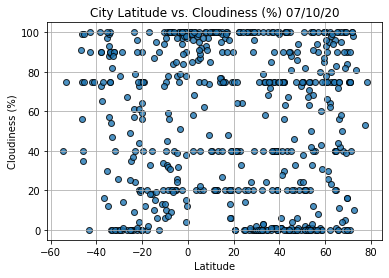

In [25]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

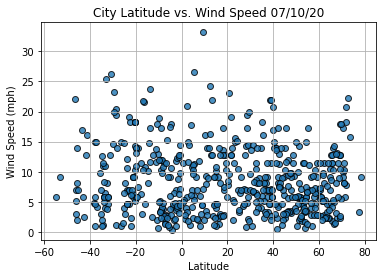

In [27]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()